# **SIMPLE LINEAR REGRESSION**


---


Pada notebook kali ini, kita akan mempelajari tentang *simple linear regression*. *Linear Regression* atau Regresi Linier adalah salah satu metode *supervised learning* dalam *machine learning*. Berbeda dengan metode klasifikasi yang memprediksi kelas atau kategori sebuah item, regresi linier berfungsi untuk memprediksi sebuah nilai berdasarkan atribut yang tersedia. Yang diprediksi adalah sejauh mana hubungan sebab akibat antara Variabel Faktor Penyebab (x) terhadap variabel akibat (y).

Apabila variabel bebasnya hanya satu, maka analisis regresinya menggunakan regresi linier sederhana. Apabila variabel bebasnya lebih dari satu, maka analisis regresinya menggunakan regresi linier berganda.

Contoh penggunaan analisis regresi linier sederhana antara lain:
 

*   Hubungan antara jumlah pekerja dengan jumlah produksi
*   Hubungan antara lama waktu bekerja dengan jabatan yang dimiliki saat ini
*   Hubungan antara lama waktu PDKT dengan keberhasilan mendapat jodoh

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)


Secara sederhana regresi linier adalah teknik untuk memprediksi sebuah nilai dari variable Y (variabel dependen) berdasarkan beberapa variabel tertentu X (variabel independen) jika terdapat hubungan linier antara X dan Y. Untuk teori lengkap mengenai regresi linier sederhana, dapat dilihat artikel tulisan ole **R. Kukuh** di medium pada [tautan berikut ini](https://medium.com/machine-learning-id/simple-linear-regression-teori-d4abebd1ade2)

Dapat kita lihat juga bahwa garis regresi yang kita buat tidak tepat mengenai semua titik-titik variabelnya. Jarak dari garis regresi ke titik-titik variabel ini lah yang akan menjadi nilai error dari permodelan regresi kita

![alt text](https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=1.0&px=400)




# Bermain dengan Data sembarang


---
Untuk memberi gambaran mengenai regresi linier sederhana, kita coba buat suatu data buatan dan mencari hubungan antara keduanya



In [ ]:
#import library dan package yang dibutuhkan

import numpy as np #untuk perhitungan saintifik
import matplotlib.pyplot as plt #untuk plotting
from sklearn.linear_model import LinearRegression #import library LinearRegression dari scikit-learn

In [ ]:
#buat data

penjualan = np.array([6,5,5,4,4,3,2,2,2,1])
harga = np.array([16000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

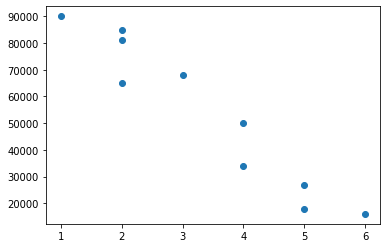

In [ ]:
#buat plot
%matplotlib inline
plt.scatter (penjualan, harga)

In [ ]:
#buat permodelan regresi

penjualan = penjualan.reshape (-1,1) #kita tukar baris dan kolom variabel ini, agar bisa dikalikan dalam operasi matriks
#untuk lebih lengkapnya baca teori soal perhitungan regresi linier

linreg = LinearRegression()
linreg.fit(penjualan, harga)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

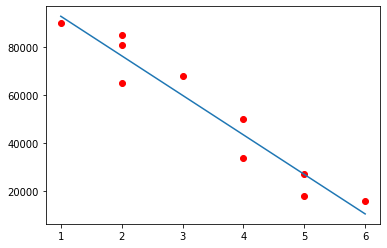

In [ ]:
#plot hasil regresi

plt.scatter(penjualan, harga, color='red')
plt.plot(penjualan, linreg.predict(penjualan))

Kita dapat melihat hubungan antara kedua variabel yang kita buat. Dalam hal ini saya membuat hubungan antara jumlah penjualan dengan harga barang. Dapat dilihat, semakin murah harga barang, maka jumlah penjualan naik.

# Bermain dengan Dataset


---


Pada notebook ini, kita akan belajar cara menggunakan library scikit-learn pada python untuk membuat permodelan regresi linier sederhana. Data yang akan kita gunakan adalah dataset konsumsi bahan bakar pada mobil yang kita dapat dari **IBM Object Storage**

In [ ]:
#import library dan package yang dibutuhkan

import pandas as pd #untuk dataframe
import pylab as pl #untuk plotting
%matplotlib inline

In [ ]:
#download data

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-06-28 16:07:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-06-28 16:07:23 (1.57 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



`FuelConsumption.csv`:

Dataset ini berisi data konsumsi bahan bakal dan estimasi emisi karbon dioksida pada beberapa model kendaraan yang dijual di Canada. Dataset berisi data:


- **MODELYEAR** 
- **MAKE** 
- **MODEL** 
- **VEHICLE CLASS** 
- **ENGINE SIZE** 
- **CYLINDERS** 
- **TRANSMISSION** 
- **FUEL CONSUMPTION in CITY(L/100 km)** 
- **FUEL CONSUMPTION in HWY (L/100 km)** 
- **FUEL CONSUMPTION COMB (L/100 km)** 
- **CO2 EMISSIONS (g/km)** 

In [ ]:
df = pd.read_csv("FuelConsumption.csv") #membaca data

# melihat 5 baris pertama data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
#kita ambil kolom mana saja yang akan kita analisis, dan membuang sisanya

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


Sebagai contoh, kita lihat hubungan antara variabel konsumsi bahan bakar di kota dengan emisi CO2

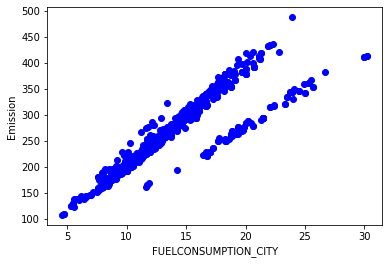

In [ ]:
#Kita plot hubungannya

plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()

Sebagai contoh juga, kita lihat hubungan antara variabel ukuran mesin dengan emisi CO2

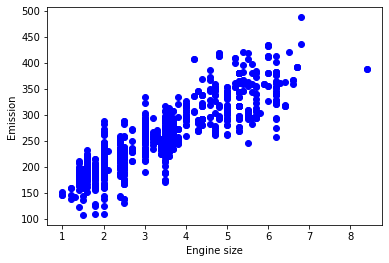

In [ ]:
#Kita plot hubungannya

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Melakukan Data Splitting

Dalam membuat permodelan Machine Learning, merupakan suatu hal yang lazim untuk membagi data ke dalam data latih (train) dan data uji (test). Kita gunakan data latih untuk melatih model, dan data uji untuk menilai performa dari permodelan yang kita buat. Hal ini kita lakukan untuk mensimulasikan, apakah model kita dapat bekerja dengan baik dalam menganalisa kasus yang belum pernah ia temui sebelumnya

![alt text](https://miro.medium.com/max/936/0*VH8IKfRP4mewrsTo.png)

Biasanya data latih akan berjumlah sekitar 70-80% dari semua data, dan sisanya adalah data latih.

In [ ]:
#Membagi data

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Di sini kita akan mencari hubungan antara ukuran mesin dengan emisi CO2 pada kendaraan

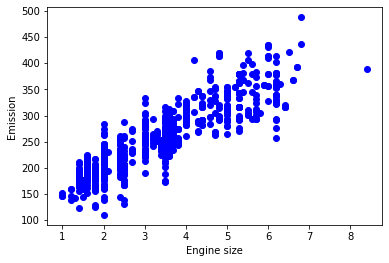

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Membuat Model Regresi

In [ ]:
#Membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# Koefisien model
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.09332068]]
Intercept:  [125.62023245]


Dalam membuat model regresi, sebenarnya kita mencari nilai-nilai *Coefficient* (gradien/kemiringan) dan *Intercept* yang kita sebut parameter model. Untuk memahami hal ini, disarankan untuk mempelajari persamaan garis dan teori dasar regresi linier pada tautan yang sudah diberikan.

Text(0, 0.5, 'Emission')

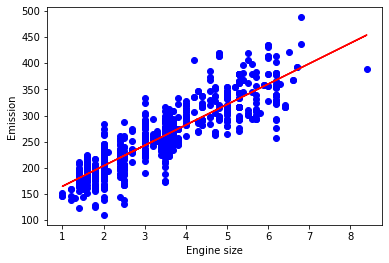

In [ ]:
#Plot hasil regresi

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#Menghitung error

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 27.50
Residual sum of squares (MSE): 1253.08
R2-score: 0.61


Dapat kita lihat, bahwa error yang dihasilkan model regresi yang kita buat cukup besar. Hal ini dikarenakan masih banyak faktor lain yang memengaruhi emisi CO2 pada kasus di atas. Permodelan regresi linier sederhan masih tergolong metode *machine learning* yang masih dasar. Oleh karena itu, kita perlu menggunakan metode *machine learning* yang lebih *powerful* lagi.